## Library

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [14]:
# membaca dataset
data = pd.read_csv('assets/data.csv')

# menampilkan data teratas
data.head()

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233


In [15]:
# menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ga:sourceMedium         156 non-null    object 
 1   ga:pageTitle            156 non-null    object 
 2   ga:users                155 non-null    float64
 3   ga:bounceRate           155 non-null    float64
 4   ga:pageviews            155 non-null    float64
 5   ga:pageviewsPerSession  155 non-null    float64
 6   ga:avgTimeOnPage        155 non-null    float64
dtypes: float64(5), object(2)
memory usage: 8.7+ KB


## Pre-processing

In [16]:
# mengganti nama kolom
data.columns = ['sourceMedium', 'pageTitle', 'users', 'bounceRate', 'pageviews', 'pageviewsPerSession', 'avgTimeOnPage']

In [17]:
# menghapus data yang kosong
df_cleaned = data.dropna()

# menyimpan hasil pembersihan
initial_row_count = data.shape[0]
final_row_count = df_cleaned.shape[0]

# menghitung jumlah baris yang dihapus
rows_deleted = initial_row_count - final_row_count

# memperlihatkan jumlah baris yang dihapus
print(f"\nJumlah baris awal: {initial_row_count}")
print(f"Jumlah baris setelah pembersihan: {final_row_count}")
print(f"Jumlah baris yang dihapus: {rows_deleted}")


Jumlah baris awal: 156
Jumlah baris setelah pembersihan: 155
Jumlah baris yang dihapus: 1


In [18]:
# mengecek duplikat data
help = df_cleaned[df_cleaned.duplicated()]

# memperlihatkan jumlah baris duplikat
print(f"Jumlah baris duplikat: {help.shape[0]}")

Jumlah baris duplikat: 0


In [19]:
# memperlihatkan data setelah pembersihan
data.head()

,sourceMedium,pageTitle,users,bounceRate,pageviews,pageviewsPerSession,avgTimeOnPage
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233


## Analisis

### Statistik Deskriptif

In [20]:
# statistik deskriptif
deskripsi = data.describe()
print("Statistik Deskriptif:\n", deskripsi)

Statistik Deskriptif:
               users  bounceRate     pageviews  pageviewsPerSession  \
count    155.000000  155.000000    155.000000           155.000000   
mean    1995.722581   31.925982   3607.174194            16.204284   
std     6449.314679   36.030184  11845.050364            32.522916   
min        9.000000    0.000000    215.000000             0.000000   
25%      108.000000    0.000000    287.000000             0.000000   
50%      233.000000   17.070773    431.000000             2.353535   
75%      458.000000   62.401881    826.000000            22.194444   
max    43893.000000  100.000000  83593.000000           268.833333   

       avgTimeOnPage  
count     155.000000  
mean       75.428357  
std        77.975259  
min         2.814915  
25%        16.948403  
50%        44.720930  
75%       109.392803  
max       449.897196  


### Jumlah Berdasarkan Source Medium

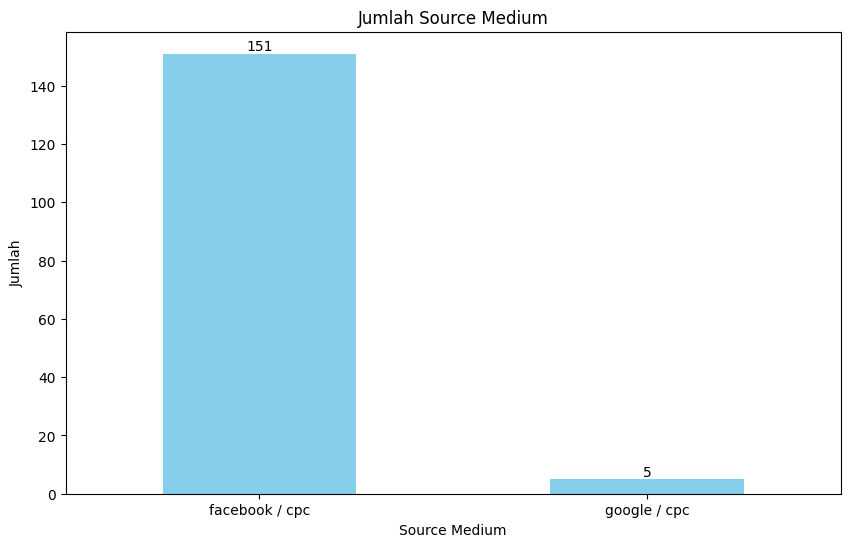

In [21]:
# menghitung jumlah sourceMedium
source_medium_count = data['sourceMedium'].value_counts()

# membuat visualisasi
plt.figure(figsize=(10, 6))
ax = source_medium_count.plot(kind='bar', color='skyblue')
plt.title('Jumlah Source Medium')
plt.xlabel('Source Medium')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

### Jumlah Users Berdasarkan Source Medium

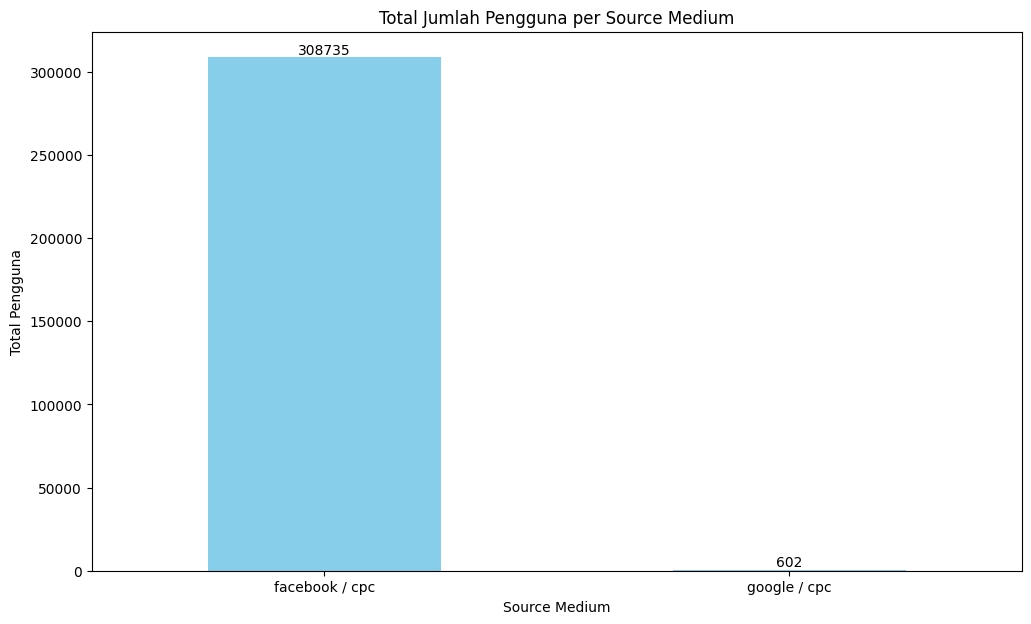

In [22]:
# Menghitung total jumlah pengguna per sourceMedium
source_medium_users = data.groupby('sourceMedium')['users'].sum()

# Membuat bar chart
plt.figure(figsize=(12, 7))
ax = source_medium_users.plot(kind='bar', color='skyblue')
plt.title('Total Jumlah Pengguna per Source Medium')
plt.xlabel('Source Medium')
plt.ylabel('Total Pengguna')
plt.xticks(rotation=0)

# Menambahkan label pada setiap bar
for i in ax.containers:
    ax.bar_label(i)

plt.show()

### Tingkat Bounce Rate berdasarkan Source Medium

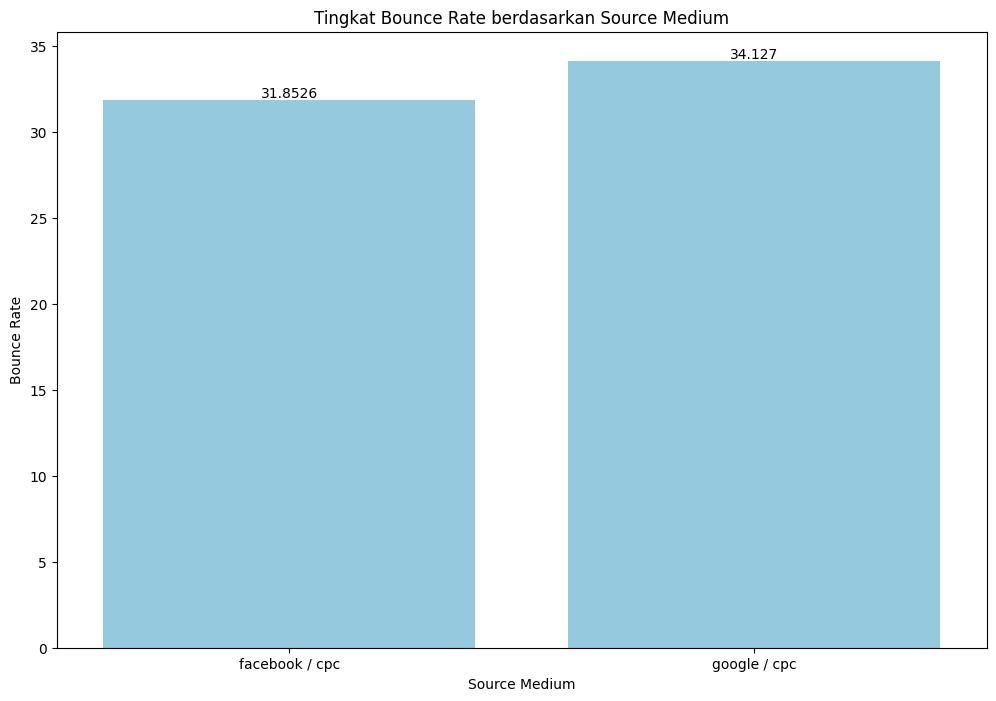

In [23]:
# Menghitung rata-rata bounce rate berdasarkan sumber lalu lintas
source_bounce_rate = data.groupby('sourceMedium', as_index=False)['bounceRate'].mean()

# Visualisasi
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='sourceMedium', y='bounceRate', data=source_bounce_rate, color='skyblue')
plt.title('Tingkat Bounce Rate berdasarkan Source Medium')
plt.xlabel('Source Medium')
plt.ylabel('Bounce Rate')
plt.xticks(rotation=0)

for i in ax.containers:
    ax.bar_label(i)

plt.show()